In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import scipy
from scipy.signal import convolve
import os

In [2]:
def gaussian_filter_2d(filter_size):
    ''' 
    (int) -> numpy.ndarray
    Gera um filtro gaussiano de tamanho filter_size.
    
    Parâmetros
    ----------
    filter_size: Tamanho do filtro gaussiano.
        
    Return
    ------
    Numpy array representando um filtro gaussiano de tamanho 'filter_size'.
    '''
    # Calcula o sigma com base o tamanho do filtro, usando a razão fiter_size = 6 * sigma
    sigma = filter_size/6.
    
    # Calcula os valores de x e y para serem usados no calculo do filtro
    x = np.linspace(-3*sigma, 3*sigma, filter_size)
    x = np.tile(x, filter_size)
    x.shape = filter_size, filter_size
    y = x.transpose()
    
    # Calculo do filtro
    z = np.exp(-(x**2+y**2)/(2*sigma**2))
    return z/np.sum(z)

def gaussianBlur(img, filter_size):
    '''
    np.array, int -> np.array
    Suaviza uma imagem dada através da convolução com um kernel gaussiano.
    
    Parâmetros
    ----------
    img : imagem de entrada a ser suavizada.
    filter_size: tamanho do filtro gaussiano.
    
    Return
    ------
    Numpy array contendo a imagem suavizada pelo filtro gaussiano de tamanho dado.
    '''
    # Filtro gaussiano
    filtro = gaussian_filter_2d(filter_size)
    img = img.astype(float)
    
    #Suaviza imagem
    img_smooth = convolve(img, filtro, mode='same')
    
    return img_smooth

def sobel(img):
    '''
    np.array -> np.array
    Extrai as bordas através da convolução com um filtro de sobel
    
    Parâmetros
    ----------
    img : imagem de entrada para detecção de bordas
    
    Return
    ------
    Numpy array representando a imagem magnitude do gradiente calculado por convolução pelo filtro de sobel.
    '''
    # Filtros derivada
    sx = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])
    sy = sx.transpose()

    img_dx_conv_sobel = convolve(img, sx, mode='same')
    img_dy_conv_sobel = convolve(img, sy, mode='same')
    
    img_mag_sobel = np.sqrt(img_dx_conv_sobel**2+img_dy_conv_sobel**2)
   

    return img_mag_sobel

def histogram_equalization(img):
    '''
    np.array -> np.array
    Com base no histograma da imagem, realiza uma equalização, com o objetivo de melhorar o contraste.

    Parâmetros
    ----------
    img : imagem a ser equalizada.
    
    Return
    ------
    Numpy array representando a imagem com o histograma já equalizado.
    '''
    bins = range(0, 257)
    hist, _ = np.histogram(img, bins)    # Calcula quantos pixels possuem cada nível de intensidade

    # Calcula a transformação para cada nível de intensidade
    mn = sum(hist)
    c = 255./mn                           # O valor de (L-1)/MN
    out_intensity = np.zeros(256)
    for k in range(256):
        soma = 0
        for j in range(0, k+1):
            soma += hist[j]
        out_intensity[k] = c*soma
    z
    # Aplica a transformação
    img_eq = np.zeros(img.shape)
    num_rows, num_cols = img.shape
    for row in range(num_rows):
        for col in range(num_cols):
            img_eq[row, col] = out_intensity[img[row, col]]
    
    return img_eq

def unsharp_mask(img, intensity):
    '''
    np.array, float -> np.array
    Realça as bordas através da aplicação do unsharp mask 
    (convolução do filtro identidade - filtro laplaciano ponderado).
    
    Parâmetros
    ----------
    img : imagem de entrada a ser realçada pela técnica.
    intensity: intensidade da ponderação do realce de bordas.
    
    Return
    ------
    Numpy array contendo a imagem com bordas destacadas através do unsharp mask.
    '''
    kernel = np.array([[0,             -1*intensity,              0],
                       [-1*intensity,  (4*intensity)+1, -1*intensity],
                       [0,             -1*intensity,              0]])
    return convolve(img, kernel, mode='same')


(1, 14, 3)
(1, 14, 3)
(1, 14, 3)


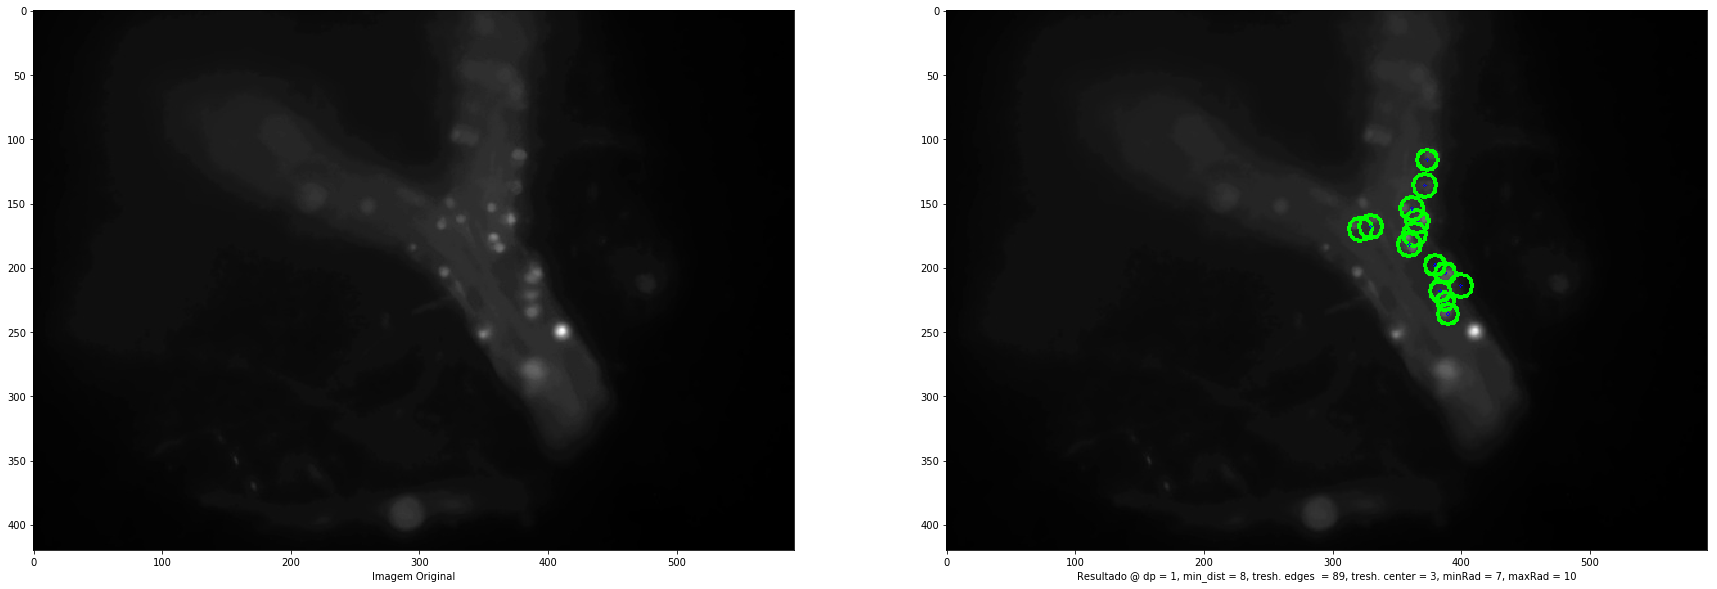

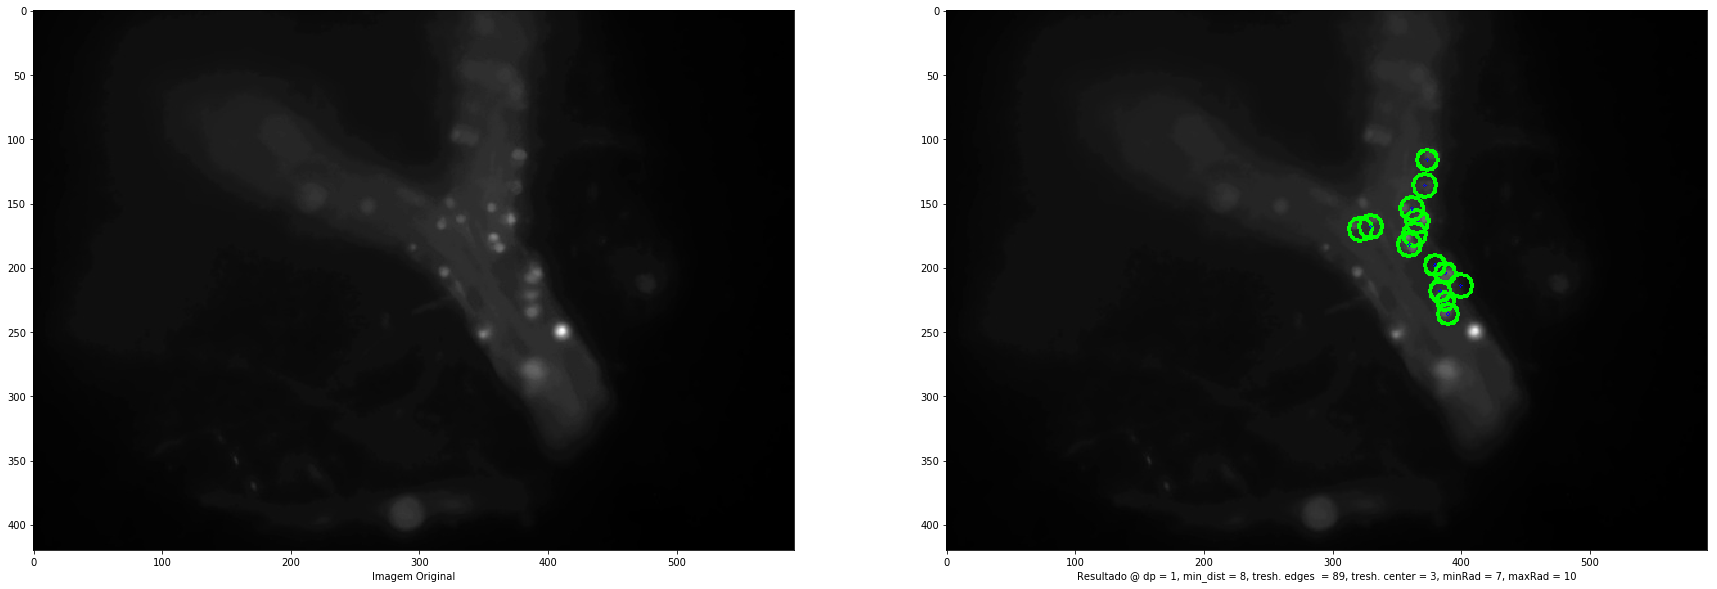

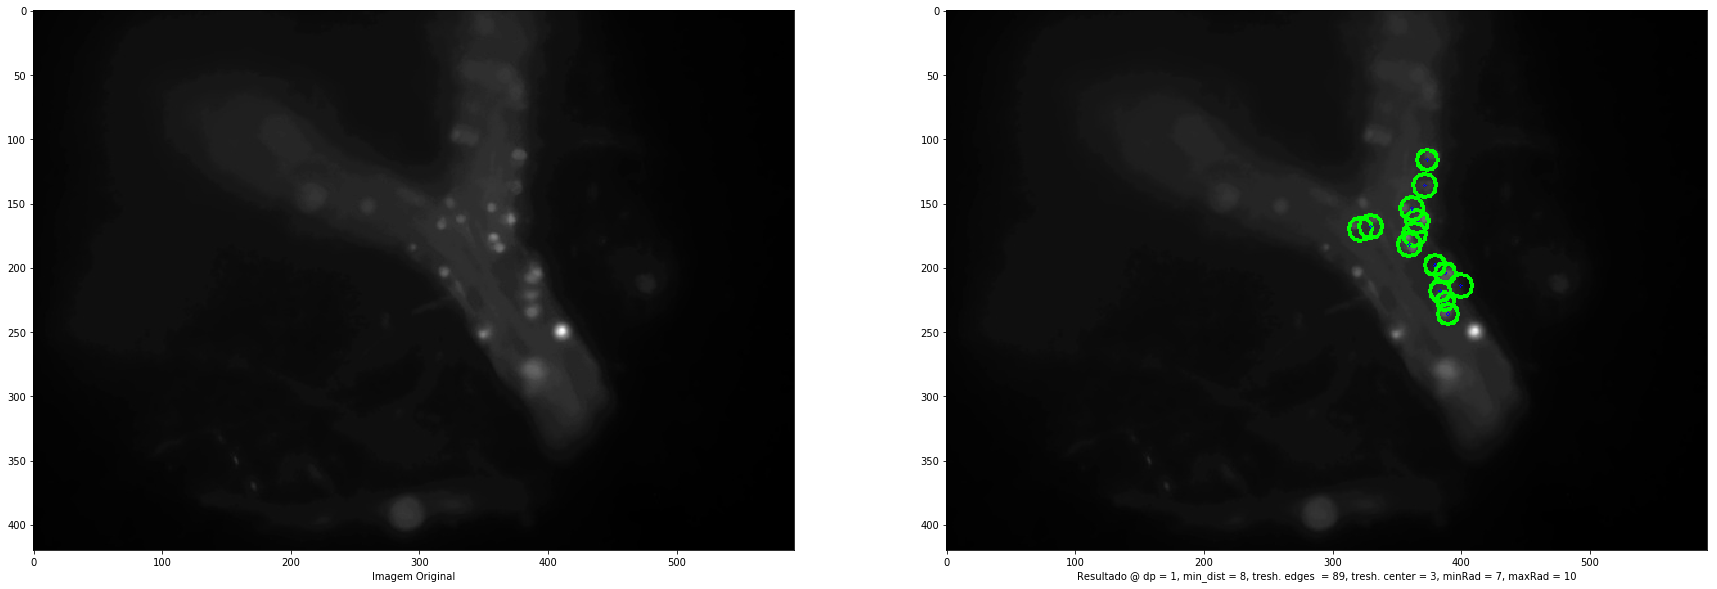

In [3]:
'''TESTE DA APLICAÇÃO DA TRANSFORMADA SOBRE UMA IMAGEM EM TONS DE CINZA'''

#Abertura da imagem
img = cv2.imread('teste1.jpg',0)

#Conversão para RGB, para sobrepor os círculos encontrados
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

#Definição dos parâmetros 
par_dp = 1         #The inverse ratio of resolution || Resolução da matriz acumuladora 
par_min_dist = 8   #Minimum distance between detected centers || Mínima distância entre os circulos detectados
par_param1 = 89    #Upper threshold for the internal Canny edge detector || Limite superior para o detector de bordas interno 
par_param2 = 3     #Threshold for center detection. || Rigidez do votador responsável pelo julgamento dos candidatos a círculos detectados
par_minRadius = 7  #mMinimum radio to be detected. If unknown, put zero as default. || Raio de busca mínimo
par_maxRadius = 10 #Maximum radius to be detected. If unknown, put zero as default || Raio de busca máximo

#Aplicação da Técnica
circles = cv2.HoughCircles(img,                #Input image (grayscale, uint8)
                           cv2.HOUGH_GRADIENT, #CV_HOUGH_GRADIENT: Define the detection method. Currently this is the only one available in OpenCV
                           par_dp,par_min_dist,param1=par_param1,param2=par_param2,minRadius=par_minRadius,maxRadius=par_maxRadius)

circles_centers = circles[:,:,0:2]

print circles.shape #A vector that stores sets of 3 values: x_{c}, y_{c}, r for each detected circle.
#print circles_centers

#Inseração dos circulos detectados sobre as imagens 
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),1,(0,0,255),1)


#Abertura da imagem
img = cv2.imread('teste1.jpg',0)

#Conversão para RGB, para sobrepor os círculos encontrados
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

#Definição dos parâmetros 
par_dp = 1         #The inverse ratio of resolution || Resolução da matriz acumuladora 
par_min_dist = 8   #Minimum distance between detected centers || Mínima distância entre os circulos detectados
par_param1 = 89    #Upper threshold for the internal Canny edge detector || Limite superior para o detector de bordas interno 
par_param2 = 3     #Threshold for center detection. || Rigidez do votador responsável pelo julgamento dos candidatos a círculos detectados
par_minRadius = 7  #mMinimum radio to be detected. If unknown, put zero as default. || Raio de busca mínimo
par_maxRadius = 10 #Maximum radius to be detected. If unknown, put zero as default || Raio de busca máximo

#Aplicação da Técnica
circles = cv2.HoughCircles(img,                #Input image (grayscale, uint8)
                           cv2.HOUGH_GRADIENT, #CV_HOUGH_GRADIENT: Define the detection method. Currently this is the only one available in OpenCV
                           par_dp,par_min_dist,param1=par_param1,param2=par_param2,minRadius=par_minRadius,maxRadius=par_maxRadius)

circles_centers = circles[:,:,0:2]

print circles.shape #A vector that stores sets of 3 values: x_{c}, y_{c}, r for each detected circle.
#print circles_centers

#Inseração dos circulos detectados sobre as imagens 
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),1,(0,0,255),1)
    
    
#Plot das imagens
plt.figure(figsize=[30, 30])
plt.subplot(1,2,1)
plt.imshow(img, "gray")
plt.xlabel("Imagem Original")
plt.subplot(1,2,2)
plt.xlabel("Resultado @ dp = {}, min_dist = {}, tresh. edges  = {}, tresh. center = {}, minRad = {}, maxRad = {}".format(par_dp, par_min_dist, par_param1, par_param2, par_minRadius, par_maxRadius))
plt.imshow(cimg, "gray")

#Abertura da imagem
img = cv2.imread('teste1.jpg',0)

#Conversão para RGB, para sobrepor os círculos encontrados
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

#Definição dos parâmetros 
par_dp = 1         #The inverse ratio of resolution || Resolução da matriz acumuladora 
par_min_dist = 8   #Minimum distance between detected centers || Mínima distância entre os circulos detectados
par_param1 = 89    #Upper threshold for the internal Canny edge detector || Limite superior para o detector de bordas interno 
par_param2 = 3     #Threshold for center detection. || Rigidez do votador responsável pelo julgamento dos candidatos a círculos detectados
par_minRadius = 7  #mMinimum radio to be detected. If unknown, put zero as default. || Raio de busca mínimo
par_maxRadius = 10 #Maximum radius to be detected. If unknown, put zero as default || Raio de busca máximo

#Aplicação da Técnica
circles = cv2.HoughCircles(img,                #Input image (grayscale, uint8)
                           cv2.HOUGH_GRADIENT, #CV_HOUGH_GRADIENT: Define the detection method. Currently this is the only one available in OpenCV
                           par_dp,par_min_dist,param1=par_param1,param2=par_param2,minRadius=par_minRadius,maxRadius=par_maxRadius)

circles_centers = circles[:,:,0:2]

print circles.shape #A vector that stores sets of 3 values: x_{c}, y_{c}, r for each detected circle.
#print circles_centers

#Inseração dos circulos detectados sobre as imagens 
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),1,(0,0,255),1)
    
    
#Plot das imagens
plt.figure(figsize=[30, 30])
plt.subplot(1,2,1)
plt.imshow(img, "gray")
plt.xlabel("Imagem Original")
plt.subplot(1,2,2)
plt.xlabel("Resultado @ dp = {}, min_dist = {}, tresh. edges  = {}, tresh. center = {}, minRad = {}, maxRad = {}".format(par_dp, par_min_dist, par_param1, par_param2, par_minRadius, par_maxRadius))
plt.imshow(cimg, "gray")
    
#Plot das imagens
plt.figure(figsize=[30, 30])
plt.subplot(1,2,1)
plt.imshow(img, "gray")
plt.xlabel("Imagem Original")
plt.subplot(1,2,2)
plt.xlabel("Resultado @ dp = {}, min_dist = {}, tresh. edges  = {}, tresh. center = {}, minRad = {}, maxRad = {}".format(par_dp, par_min_dist, par_param1, par_param2, par_minRadius, par_maxRadius))
plt.imshow(cimg, "gray")

In [4]:
def myHough(img, circles, minDist, minRadius, maxRadius):
    '''
    TERMINAR A IMPLEMENTAÇÃO E A DOCUMENTAÇÃO DESTA FUNÇÃO
    '''
    #Aplica uma suavização gaussiana
    img_smooth = gaussianBlur(img, 3)
    
    #Aplica a detecção de bordas pelo filtro de sobel
    img_edges = sobel(img_smooth)
    
    #Binariza as bordas detectadas
    Otsu_Threshold = threshold_otsu(img_edges)

    binary = np.zeros(img.shape, dtype = "int")
    
    binary[img_edges > Otsu_Threshold] = 255 
    
    return np.uint8(binary)

(1, 25, 3)


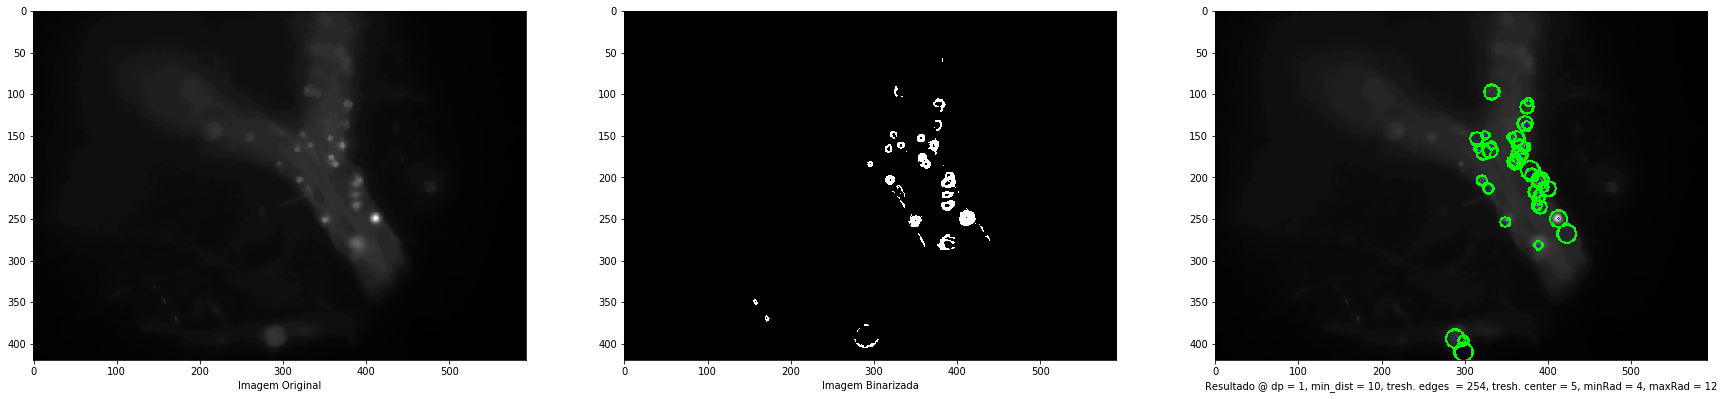

In [5]:
'''TESTE DE APLICAÇÃO DA TRANSFORMADA SOBRE UMA IMAGEM BINARIZADA'''
#Aplicação da técnica com implementação própria 
my_img = myHough(img,0,0,0,0)

#Definição dos parâmetros 
par_dp = 1         #The inverse ratio of resolution || Resolução da matriz acumuladora 
par_min_dist = 10  #Minimum distance between detected centers || Mínima distância entre os circulos detectados
par_param1 = 254   #Upper threshold for the internal Canny edge detector || Limite superior para o detector de bordas interno 
par_param2 = 5     #Threshold for center detection. || Rigidez do votador responsável pelo julgamento dos candidatos a círculos detectados
par_minRadius = 4  #mMinimum radio to be detected. If unknown, put zero as default. || Raio de busca mínimo
par_maxRadius = 12 #Maximum radius to be detected. If unknown, put zero as default || Raio de busca máximo

#Aplicação da Técnica
circles = cv2.HoughCircles(my_img,             #Input image (grayscale, uint8)
                           cv2.HOUGH_GRADIENT, #CV_HOUGH_GRADIENT: Define the detection method. Currently this is the only one available in OpenCV
                           par_dp,par_min_dist,param1=par_param1,param2=par_param2,minRadius=par_minRadius,maxRadius=par_maxRadius)

print circles.shape #A vector that stores sets of 3 values: x_{c}, y_{c}, r for each detected circle.

#Inseração dos circulos detectados sobre as imagens 
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),1,(0,0,255),1)

#Plot das imagens   
plt.figure(figsize=[30, 30])
plt.subplot(1,3,1)
plt.xlabel("Imagem Original")
plt.imshow(img, "gray")
plt.subplot(1,3,2)
plt.xlabel("Imagem Binarizada")
plt.imshow(my_img, "gray")
plt.subplot(1,3,3)
plt.xlabel("Resultado @ dp = {}, min_dist = {}, tresh. edges  = {}, tresh. center = {}, minRad = {}, maxRad = {}".format(par_dp, par_min_dist, par_param1, par_param2, par_minRadius, par_maxRadius))
plt.imshow(cimg, "gray")


(1, 17, 3)


Text(0.5,0,'Imagem c/ Mask c/ Unsharp Mask')

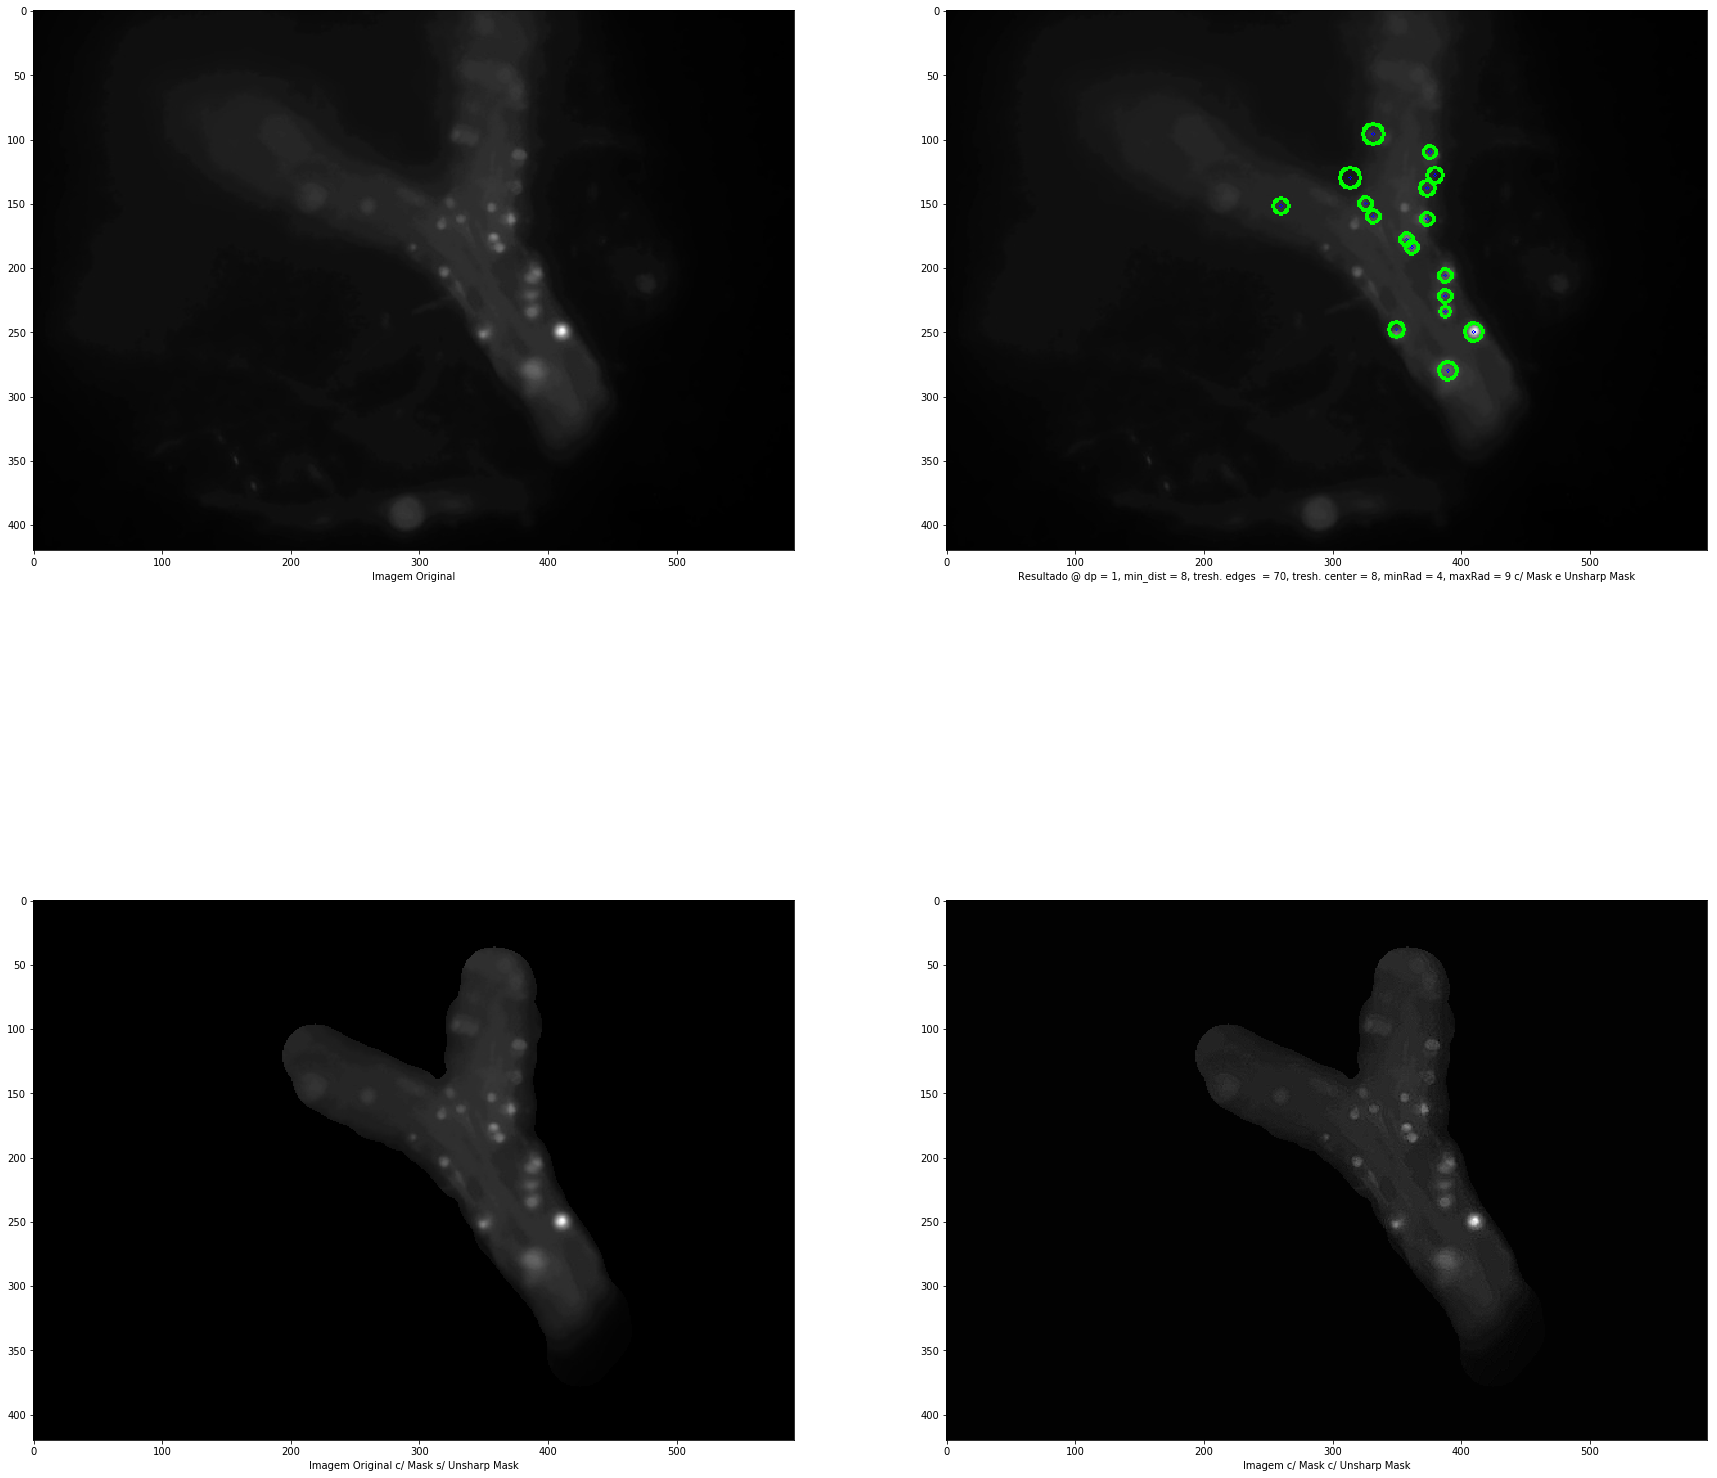

In [6]:
'''TESTE DE APLICAÇÃO DA TRANSFORMADA SOBRE UMA IMAGEM EM TONS DE CINZA, COM MÁSCARA E COM DESTAQUE DE BORDAS'''
#Leitura da imagem e da máscara
img = cv2.imread('teste1.jpg',0)
mask = cv2.imread('maskt1.png',0)

#Conversão para RGB, para sobrepor os círculos encontrados
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

#Subplot 1: 
plt.figure(figsize=[30, 30])
plt.subplot(2,2,1)
plt.imshow(img,"gray")
plt.xlabel("Imagem Original")
           
#Criação de uma imagem com máscara sem a melhoria de contraste
img_original_masked = np.multiply(img, mask)
    
#Melhora de contraste
img_enhanced = unsharp_mask(img, 1)

#Aplicação da máscara
img_enhanced_masked = np.multiply(img_enhanced,mask)

#Conversão para uint8, requisito do método.
img_enhanced_masked_uint8 = np.uint8(img_enhanced_masked)

#Equalização do histograma para melhora no contraste
'''
NOTA MENTAL: IMPLEMENTAR UMA EQUALIZAÇÃO DE HISTROGRAMA QUE SÓ LEVA EM CONSIDERAÇÃO OS PIXELS DIFERENTES DE ZERO
'''
#img = np.uint8(histogram_equalization(img))

#Definição dos parâmetros 
par_dp = 1         #The inverse ratio of resolution || Resolução da matriz acumuladora 
par_min_dist = 8  #Minimum distance between detected centers || Mínima distância entre os circulos detectados
par_param1 = 70   #Upper threshold for the internal Canny edge detector || Limite superior para o detector de bordas interno 
par_param2 = 8     #Threshold for center detection. || Rigidez do votador responsável pelo julgamento dos candidatos a círculos detectados
par_minRadius = 4  #mMinimum radio to be detected. If unknown, put zero as default. || Raio de busca mínimo
par_maxRadius = 9 #Maximum radius to be detected. If unknown, put zero as default || Raio de busca máximo

#Aplicação da Técnica
circles = cv2.HoughCircles(img_enhanced_masked_uint8,                #Input image (grayscale, uint8)
                           cv2.HOUGH_GRADIENT, #CV_HOUGH_GRADIENT: Define the detection method. Currently this is the only one available in OpenCV
                           par_dp,par_min_dist,param1=par_param1,param2=par_param2,minRadius=par_minRadius,maxRadius=par_maxRadius)

print circles.shape #A vector that stores sets of 3 values: x_{c}, y_{c}, r for each detected circle.

#Inseração dos circulos detectados sobre as imagens 
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),1,(0,0,255),1)
    

#Subplot 2:
plt.subplot(2,2,2)
plt.imshow(cimg,"gray")
plt.xlabel("Resultado @ dp = {}, min_dist = {}, tresh. edges  = {}, tresh. center = {}, minRad = {}, maxRad = {} c/ Mask e Unsharp Mask".format(par_dp, par_min_dist, par_param1, par_param2, par_minRadius, par_maxRadius))

#Subplot 3:
plt.subplot(2,2,3)
plt.imshow(img_original_masked,"gray")
plt.xlabel("Imagem Original c/ Mask s/ Unsharp Mask")
#Subplot 4:
plt.subplot(2,2,4)
plt.imshow(img_enhanced_masked,"gray")
plt.xlabel("Imagem c/ Mask c/ Unsharp Mask")

In [11]:
'''TESTE DE APLICAÇÃO DA TRANSFORMADA SOBRE TODO O CONJUNTO DE IMAGENS TESTE'''
#Definição do diretório fonte, contendo as imagens a serem processadas
diretorio = "to_process/"

#Lista todos os arquivos no diretório
files = os.listdir(diretorio)    

#Organiza todos os arquivos encontrados
files = np.sort(files)

#Extrai, uma-a-uma, as imagens do diretório para serem processadas 
num_files = len(files)
img_matrix = np.zeros((num_files,420,592), dtype=np.uint8)

for file_index, file in enumerate(files):
    img_matrix[file_index] = cv2.imread((diretorio+file),0)

    #Conversão para RGB, para sobrepor os círculos encontrados
    cimg = cv2.cvtColor(img_matrix[file_index],cv2.COLOR_GRAY2BGR)
    
    #Aplicação do unsharp mask para o destaque de bordas
    img_enhanced = unsharp_mask(img_matrix[file_index], 1)
   
    #Aplicação da máscara
    img_enhanced_masked = np.multiply(img_enhanced,mask)
    
    #Conversão para uint8, requisito do método
    img_enhanced_masked_uint8 = np.uint8(img_enhanced_masked)
    
    #Definição dos parâmetros 
    par_dp = 1        #The inverse ratio of resolution || Resolução da matriz acumuladora 
    par_min_dist = 8  #Minimum distance between detected centers || Mínima distância entre os circulos detectados
    par_param1 = 70   #Upper threshold for the internal Canny edge detector || Limite superior para o detector de bordas interno 
    par_param2 = 8    #Threshold for center detection. || Rigidez do votador responsável pelo julgamento dos candidatos a círculos detectados
    par_minRadius = 4 #mMinimum radio to be detected. If unknown, put zero as default. || Raio de busca mínimo
    par_maxRadius = 9 #Maximum radius to be detected. If unknown, put zero as default || Raio de busca máximo

    #Aplicação da Técnica
    circles = cv2.HoughCircles(img_enhanced_masked_uint8, #Input image (grayscale, uint8)
                           cv2.HOUGH_GRADIENT,            #CV_HOUGH_GRADIENT: Define the detection method. Currently this is the only one available in OpenCV
                           par_dp,par_min_dist,param1=par_param1,param2=par_param2,minRadius=par_minRadius,maxRadius=par_maxRadius)
    #A vector that stores sets of 3 values: x_{c}, y_{c}, r for each detected circle.
    
    if (len(circles) > 0):
        #Inseração dos circulos detectados sobre as imagens 
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            # draw the outer circle
            cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
            # draw the center of the circle
            cv2.circle(cimg,(i[0],i[1]),1,(0,0,255),1)
    
    #Subplot 1: 
    plt.figure(figsize=[30, 30])
    plt.subplot(1,2,1)
    plt.imshow(img_matrix[file_index],"gray")
    plt.xlabel("Imagem Original")
   
    #Subplot 2:
    plt.subplot(1,2,2)
    plt.imshow(cimg,"gray")
    plt.xlabel("Resultado @ dp = {}, min_dist = {}, tresh. edges  = {}, tresh. center = {}, minRad = {}, maxRad = {} c/ Mask e Unsharp Mask".format(par_dp, par_min_dist, par_param1, par_param2, par_minRadius, par_maxRadius))
    plt.savefig("processed/img{}.jpg".format(file_index),bbox_inches='tight')
    plt.close()
    
    #Salvando as imgens processadas em suas dimensões originais
    cv2.imwrite("processed_solo/img{}.jpg".format(file_index),img_matrix[file_index])
    print file_index

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
